<b>Logarithmic in Data ANalysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_log = pd.read_csv('revenue.csv')
df_log.head()

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6


<AxesSubplot:xlabel='company'>

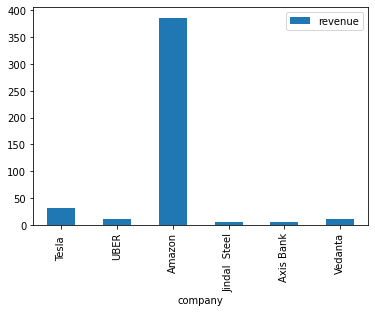

In [5]:
df_log.plot(x='company', y='revenue', kind='bar')

<AxesSubplot:xlabel='company'>

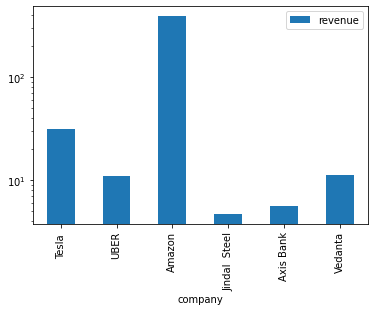

In [10]:
df_log.plot(x='company', y='revenue', kind='bar', logy=True) #Scaling using Log

<b><center><h2>Normal Distribution

In [31]:
import seaborn as sns

In [32]:
df_heights = pd.read_csv('heights.csv')

In [33]:
df_heights.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


<b>(1)Will be removing the outlier using the Normal 3Sigma

<AxesSubplot:xlabel='height', ylabel='Count'>

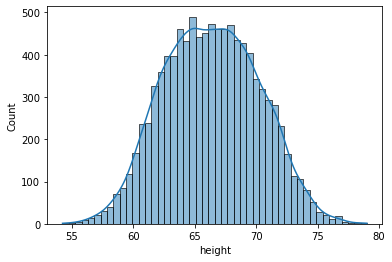

In [57]:
sns.histplot(df_heights.iloc[:,1],kde=True)

In [34]:
df_heights.shape

(10000, 2)

In [35]:
df_heights.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [41]:
std_dev = df_heights.height.std()
std_dev

3.847528120795573

In [42]:
avg_mean = df_heights.height.mean()
avg_mean

66.3675597548656

In [43]:
lowend = avg_mean-3*std_dev
highend = avg_mean+3*std_dev
lowend,highend

(54.824975392478876, 77.91014411725232)

In [40]:
df_heights[(df_heights.height<lowend) | (df_heights.height>highend)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [27]:
df_new_height = df_heights[(df_heights.height>lowend) & (df_heights.height<highend)]

In [29]:
df_new_height #Outliers have been removed

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<b>(2)Removing Outlier using Z-Score --------- (x-Mean)/Std

In [77]:
df_heights['z_scores'] = (df_heights.height-avg_mean)/std_dev

In [78]:
df_heights.head()

,gender,height,z_scores
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [79]:
df_heights.shape

(10000, 3)

In [80]:
df_heights[(df_heights.z_scores<3) | (df_heights.z_scores>-3)] #ll the Outliers

,gender,height,z_scores
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [70]:
df_heights[(df_heights.z_scores>3) & (df_heights.z_scores<-3)]

,gender,height,z_scores


<b><center><h2>Mean, Median, Mode Percentile

In [82]:
import numpy as np

In [101]:
df_per = pd.read_csv('income_mean.csv', names=['Name', 'income'], skiprows=[0])
df_per

,Name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


<AxesSubplot:ylabel='Count'>

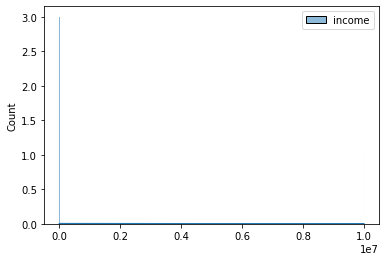

In [102]:
sns.histplot(df_per,kde=True)

<AxesSubplot:xlabel='Name'>

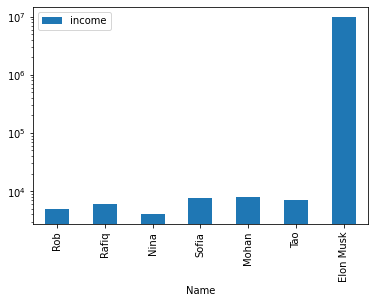

In [103]:
df_per.plot(x='Name', y='income', logy=True, kind='bar')

In [111]:
df_per.describe().T

,count,mean,std,min,25%,50%,75%,max
income,7.0,1.433929e+06,3.777283e+06,4000.0,5500.0,7000.0,7750.0,10000000.0


In [104]:
df_per.income.quantile(0.50)

7000.0

In [105]:
df_per.income.quantile(0.45, interpolation='lower')

6000

In [108]:
df_per.income.quantile(0.45, interpolation='linear')

6700.0

In [109]:
df_per.income.quantile(0.45, interpolation='higher')

7000

In [113]:
quant_set = df_per.income.quantile(0.99)

<b>(3)Outlier Removal using Quantile

In [114]:
df_per[df_per.income<quant_set] #Here Elon Musk Bye Bye

,Name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


<b>Will be filling null values using mean median or mode

In [116]:
df_per.income[3]=np.NAN #Adding an NAN Value

<ipython-input-116-8b7a5239a98a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per.income[3]=np.NAN
S:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [117]:
df_per

,Name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [118]:
med_per = df_per.income.median()

In [119]:
df_per.fillna(med_per)

,Name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


<b><center><h2>Log Normal Distribution

In [123]:
df_lognormal = pd.read_csv('income_log_normal.csv', names=['income', 'count'], skiprows=[0])
df_lognormal.head()

,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


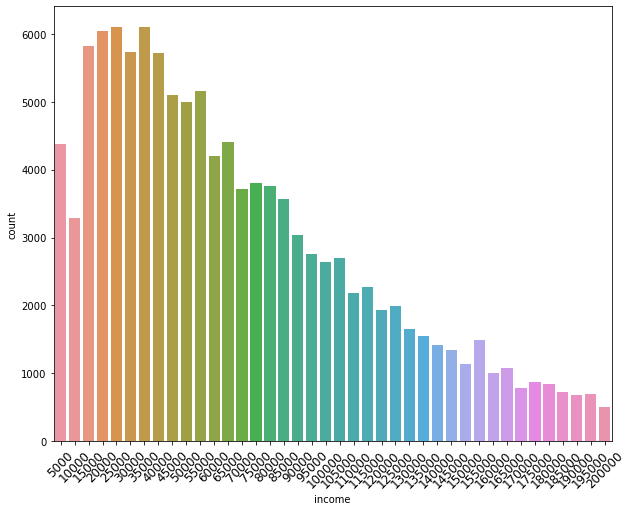

In [135]:
plt.figure(figsize=(10,8))
sns.barplot(x='income',y='count',data=df_lognormal)
plt.xticks(rotation=45, fontsize=12)

plt.show()

In [138]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#g = sns.barplot(x='income',y='count',data=df)
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

#g.set(xscale="log");

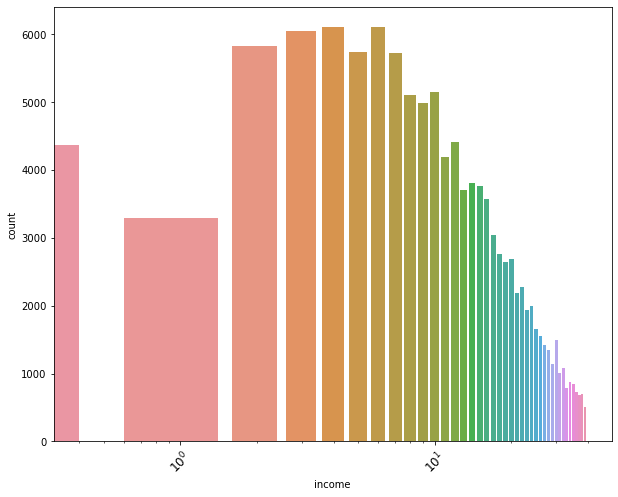

In [137]:
plt.figure(figsize=(10,8))
sns.barplot(x='income',y='count',data=df_lognormal)
plt.xticks(rotation=45, fontsize=12)
plt.xscale('log')

plt.show()